# **2.Data cleaning**

## Objectives
1. Data exploration
2. Data cleaning and analytics to see the cleaning effects.

## Inputs
1. house_prices_records.csv

## Outputs
1. Data exploration
* List of variables with missing data.
* Data profiling report.

2. Data cleaning
* Summary of missing data
* Visualizations showing the distribution of variables before and after imputation.
* Cleaned dataset with missing values imputed appropriately.

3. Data splitting
* Training and test sets

---

# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-mvp'

---

# Explore the data

Load the data

In [4]:
import pandas as pd
df1 = pd.read_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/house_prices_records.csv")
df1.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


In Data Cleaning we are interested to check the distribution and shape of a variables. Data cleaning will be performed before correlation study due to that missing values can distort correlation calculations. The correlation methods that are planned to use (Spearman and Pearson) cannot handle missing values directly and will either omit them or return incorrent results. Also that completeness of data will provide a more accurate picture of the relationships between variables.

In [5]:
vars_with_missing_data = df1.columns[df1.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df1, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Custom function from Code Institute's churnometer project to display missing levels in a DataFrame, it show the absolute levels, relative levels and data type.

In [7]:
def EvaluateMissingData(df):
    missing_data_absolute = df1.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                    "PercentageOfDataset": missing_data_percentage,
                                    "DataType": df.dtypes}
                                    )
                        .sort_values(by=['PercentageOfDataset'], ascending=False)
                        .query("PercentageOfDataset > 0")
                        )

    return df_missing_data

EvaluateMissingData(df1)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


Define the variables that are going to be used in DataCleaningEffect()

In [8]:
variables_applied_with_method = [
    'EnclosedPorch', 'WoodDeckSF', 'LotFrontage', 'GarageFinish',
    'BsmtFinType1', 'BedroomAbvGr', '2ndFlrSF', 'GarageYrBlt', 'MasVnrArea'
]

Define the analysed dataset

In [9]:
import pandas as pd
df_original = pd.read_csv("/workspace/heritage-housing-mvp/outputs/datasets/collection/house_prices_records.csv")

Defining DataCleaningEffect() function:
* Code copied and adapted from Unit 9 of the feature engine lesson

In [10]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt

def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):
    """
    Function to visualize data cleaning effect
    """
    flag_count=1 # Indicate plot number

    # Distinguish between numerical and categorical variables
    categorical_variables = df_original.select_dtypes(exclude=['number']).columns

    # scan over variables,
    # first on variables that you applied the method
    # if the variables is a numerical plot, a histogram if categorical plot a barplot
    for set_of_variables in [variables_applied_with_method]:
        print("\n================================================================================================")
        print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
        print(f"{set_of_variables} \n\n")

    for var in set_of_variables:
        if var in categorical_variables: # it is categorical variable: barplot

            dfA = pd.DataFrame({"Type":"Original","Value":df_original[var]})
            dfB = pd.DataFrame({"Type":"Cleaned","Value":df_cleaned[var]})
            dfAux = pd.concat([dfA, dfB], axis=0)
            fig, axes = plt.subplots(figsize=(15, 5))
            sns.countplot(hue='Type', data=dfAux, x="Value", palette=['#432371', "#FAAE7B"])
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()

        else: # it is numerical variable: histogram

            fig, axes = plt.subplots(figsize=(10, 5))
            sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True, element="step", ax=axes)
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.legend()

        plt.show()
        flag_count+= 1

---

# Data splitting

Split train and test set

In [11]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df1,
                                        df1['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


---

# Clean the data

**Median imputation:**


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['LotFrontage', 'GarageYrBlt', 'MasVnrArea', '2ndFlrSF'] 




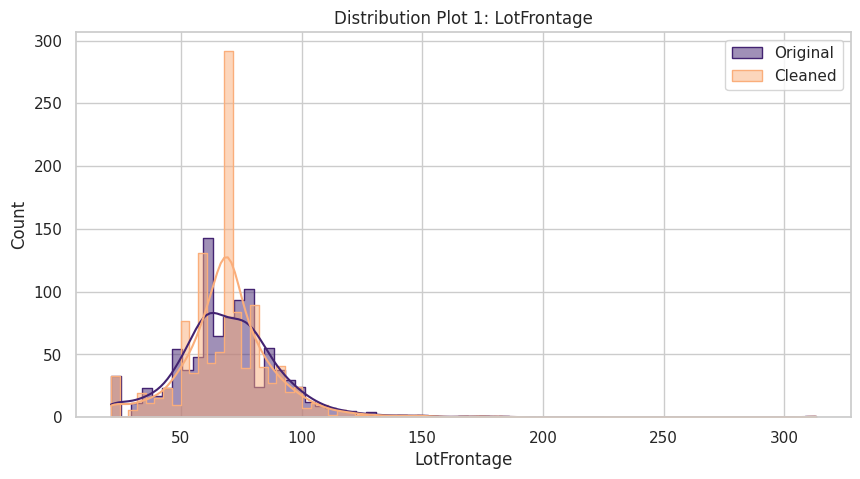

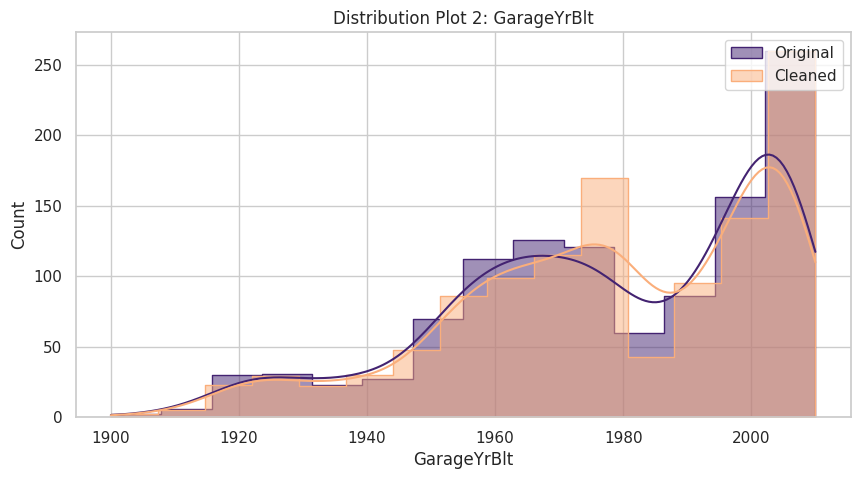

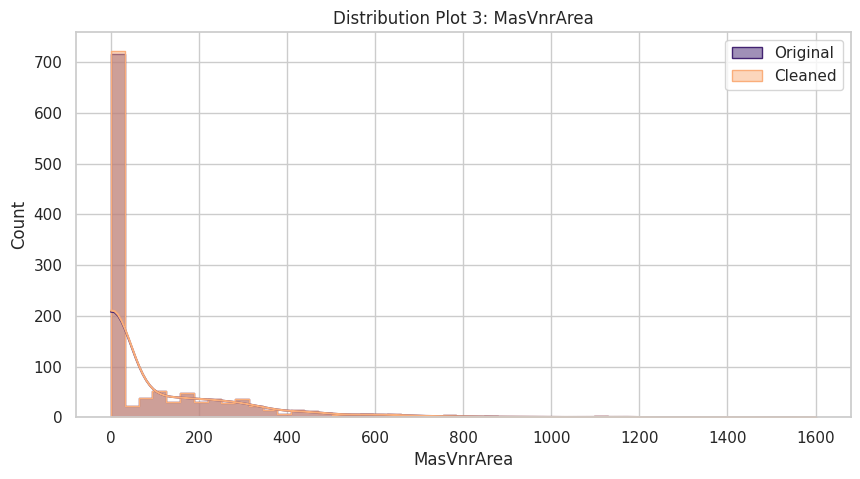

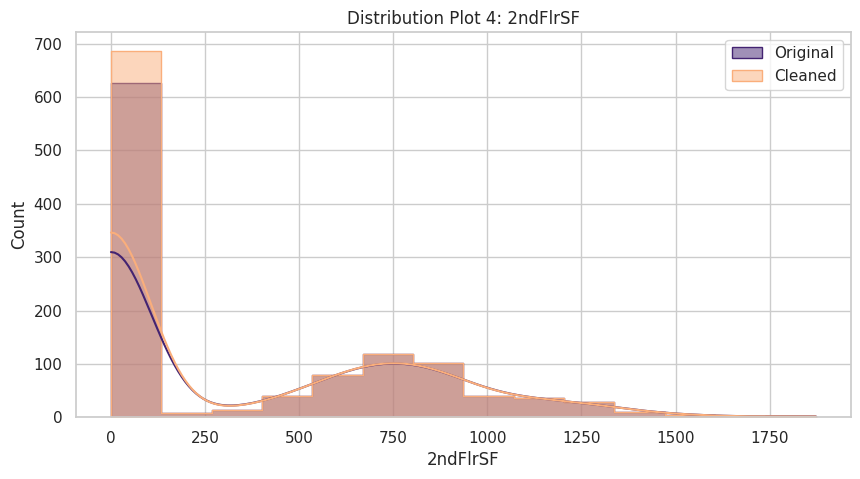

In [12]:
from feature_engine.imputation import MeanMedianImputer

variables_median = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', '2ndFlrSF']

imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                    df_cleaned=df_method,
                    variables_applied_with_method=variables_median)

Median imputation appears to be justified approach for handling missing values in these datasets. It effectively maintains the original distribution patterns and does not introduce singificant distortions.

**Drop the variables**

In [13]:
from feature_engine.selection import DropFeatures

variables_drop = ['EnclosedPorch', 'WoodDeckSF']

imputer = DropFeatures(features_to_drop=variables_drop)
df_method = imputer.fit_transform(TrainSet)

for i in variables_drop:
    print(i in df_method.columns.to_list())

False
False


**Categorical imputing with 'None':**

Comparison analysis between GarageFinish and GarageArea to see if it is reasonable to impute with None.

In [14]:
TrainSet[(TrainSet['GarageArea'] ==0)][['GarageFinish', 'GarageArea']]

,GarageFinish,GarageArea
431,NaN,0
638,None,0
1337,None,0
528,NaN,0
960,None,0
1011,None,0
1283,None,0
1038,None,0
165,None,0
1349,None,0


Now do the same for BsmtFinType1, with comparison of TotalBsmtSF

In [15]:
TrainSet[(TrainSet['TotalBsmtSF'] ==0)][['BsmtFinType1', 'TotalBsmtSF']]

,BsmtFinType1,TotalBsmtSF
156,None,0
646,None,0
259,None,0
984,None,0
1011,None,0
553,None,0
1045,None,0
371,None,0
533,None,0
1412,None,0



* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BsmtFinType1', 'GarageFinish'] 




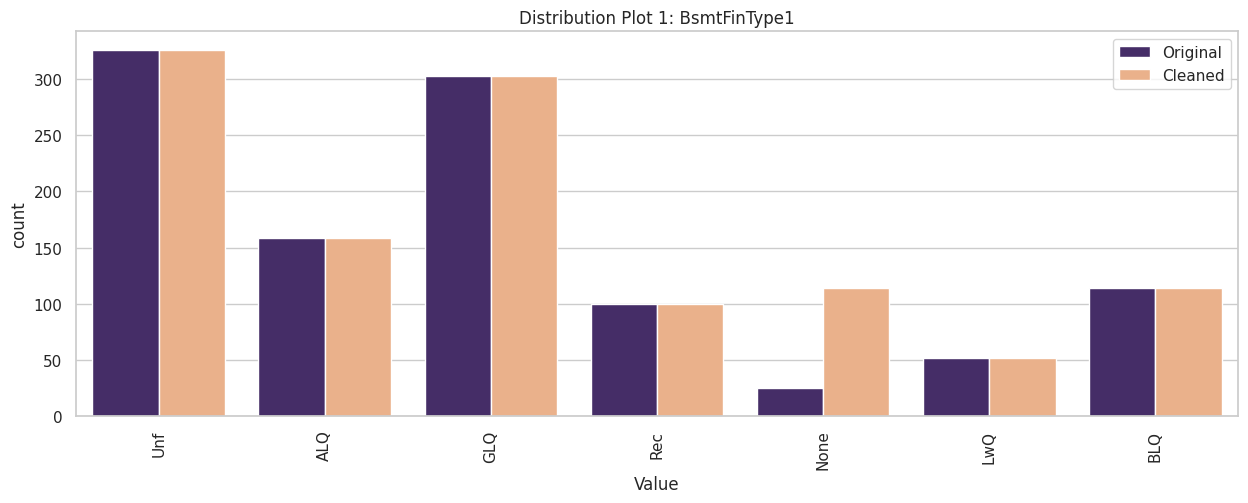

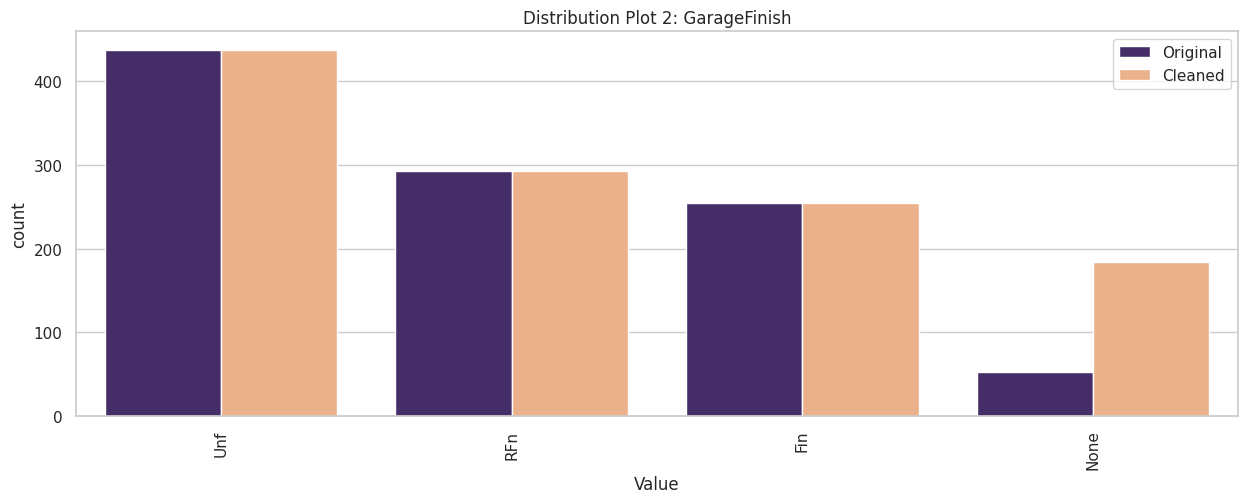

In [16]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['BsmtFinType1', 'GarageFinish']

imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                    df_cleaned=df_method,
                    variables_applied_with_method=variables_categorical)


**Mean imputing:**


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['BedroomAbvGr'] 




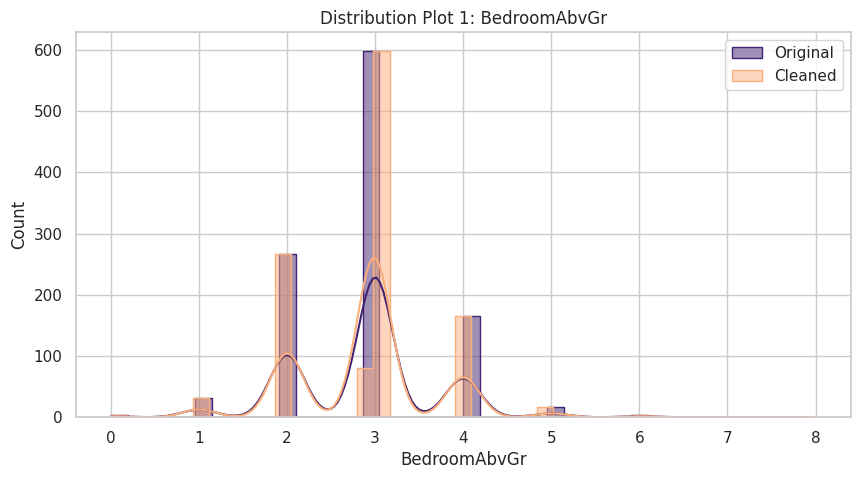

In [17]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['BedroomAbvGr']

imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                    df_cleaned=df_method,
                    variables_applied_with_method=variables_mean)

**Imputation Methods:**
1. LotFrontage:
* Will be imputed with the median value since it's a continuous numerical variable, and the median is robust to outliers.
2. GarageYrBlt:
* Imputation with the median value. It represents the year the garage was built, so using the median provides a reasonable value because preservation of the most common value, less affected by extreme values and preservation of temporal trends.
3. MasVnrArea:
* Since only 0.5% of the data is missing, it's safe to impute with the median value for this continuous numerical variable.
4. 2ndFlrSF:
* Imputation with median is justified, because of it's robustness and low levels of missing data (5.9%).
5. BedroomAbvGr:
* Imputation with the mean since it's a discrete numerical variable representing the number of bedrooms above grade.
6. BsmtFinType1 and GarageFinish:
* The comparison analysis showed that it is reasonable to assume that missing values can be be seen as there is none of that area present.
8. EnclosedPorch, WoodDeckSF:
* Will be dropped since of high levels of missing data.


---

# Data cleaning pipeline

Organize all the data cleaning steps into a single cleaning pipeline.

In [18]:
from sklearn.pipeline import Pipeline

dataCleaning_pipeline = Pipeline([
    ('median', MeanMedianImputer(imputation_method='median',
                                variables=['LotFrontage','GarageYrBlt','MasVnrArea','2ndFlrSF']) ),
    ('drop', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF']) ),
    ('categorical', CategoricalImputer(imputation_method='missing',
                                fill_value='None',
                                variables=['BsmtFinType1', 'GarageFinish']) ),
    ('mean', MeanMedianImputer(imputation_method='mean',
                                variables=['BedroomAbvGr']) ),
])

Apply the pipeline to the whole dataset to get cleaned data.

In [19]:
TrainSet, TestSet = dataCleaning_pipeline.fit_transform(TrainSet) , dataCleaning_pipeline.fit_transform(TestSet)

In [20]:
df1 = dataCleaning_pipeline.fit_transform(df1)

In [21]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [22]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [23]:
EvaluateMissingData(df1)

,RowsWithMissingData,PercentageOfDataset,DataType


Save the cleaned datasets

In [25]:
try:
    os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
    print(e)

In [26]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

In [27]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

In [28]:
df1.to_csv("outputs/datasets/cleaned/HousePricesCleaned.csv", index=False)

---

# Conclusion

In this notebook it was successfully navigated through several critical steps to ensure the dataset was adequately prepared for further analysis and modeling.

1. Data exploration
* Dataset was previewed, which gave an initial understanding of its structures and contents.
* Variables with missing data were identified, highlighting key areas that require cleaning.

2. Data profiling
* Detailed profiling report was generated, providing insights into data distributions, and missing data patterns.

3. Data cleaning
* Missing data was summarized, understanding its extent and distribution across the dataset.
* Several imputation methods were applied:
- Median imputation method for 'LotFrontage', 'GarageYrBlt', 'MasVnrArea' and '2ndFlrSf'.
- Mode imputation for 'BedroomAbvGr'
- Categorical imputer for 'BsmtFinType1' and 'GarageFinish'.
* Variables with high levels of missing data, such as 'EnclosedPorch' and 'WoodDeckSF', were dropped.
* The effect of data cleaning on the distribution of variables was visualized, ensuring that the imputation methods maintained the integrity of the data.

4. Cleaned datasets were saved.

